In [65]:
import pandas as pd

In [66]:
#第1題
ds = pd.read_csv('dataset.csv')

In [67]:
#第2題
null_counts = ds.isnull().sum()
print(null_counts)

year                                  0
iso_code                              0
countries                             0
eco_freedom                         723
rank                                723
government_consumption              589
transfers                           960
gov_enterprises                     646
top_marg_tax_rate                  1047
size_government                     647
judicial_independence              1553
impartial_courts                   1179
protection_property_rights         1129
military_interference              1186
integrity_legal_system             1153
legal_enforcement_contracts        1361
restrictions_sale_real_property    1384
reliability_police                 2071
business_costs_crime               2071
gender_adjustment                    66
property_rights                     755
money_growth                        644
std_inflation                       607
inflation                           607
freedom_own_foreign_currency        621


In [68]:
#第3題
#刪除後顯示可看到只剩2005年(含)以後的資料
ds = ds.drop(ds[ds['year'] <= 2004].index)
ds.groupby(['year']).size()

year
2005    162
2006    162
2007    162
2008    162
2009    162
2010    162
2011    162
2012    162
2013    162
2014    162
2015    162
2016    162
dtype: int64

In [69]:
#第4題
#刪除完後顯示出eco_freedom空值數量為0
ds = ds.dropna(subset=['eco_freedom'])
eco_freedom_null_count = ds['eco_freedom'].isnull().sum()
print('eco_freedom空值數量: ',eco_freedom_null_count)

eco_freedom空值數量:  0


In [70]:
#第5題-1
#先檢查freedom_own_foreign_currency欄位有哪些值
ds.groupby(['freedom_own_foreign_currency']).size()

freedom_own_foreign_currency
HIGH      994
LOW       414
NORMAL    393
dtype: int64

In [71]:
#第5題-2
#將freedom_own_foreign_currency欄位依據：(HIGH=2，NORMAL=1，LOW=0)替換成數字型態並顯示替換成果
ds['freedom_own_foreign_currency'] = ds['freedom_own_foreign_currency'].replace({'HIGH': 2, 'NORMAL': 1, 'LOW': 0}).astype(int)
ds.groupby(['freedom_own_foreign_currency']).size()

freedom_own_foreign_currency
0    414
1    393
2    994
dtype: int64

In [72]:
#第6題
ds['freedom'] = ds['eco_freedom'].apply(lambda x: 1 if x >= 6 else 0)
ds.drop('eco_freedom', axis=1, inplace=True)
ds.groupby(['freedom']).size()

freedom
0     335
1    1466
dtype: int64

In [73]:
#第7題

# 檢查出有空值的欄位
null_cols = ds.columns[ds.isnull().any()]

# 將該欄位所有空值替換為平均值
for col in null_cols:
    col_mean = ds[col].mean()
    ds[col].fillna(col_mean, inplace=True)

#印出新的各欄位空值數可看到空值數全部為零
new_null_counts = ds.isnull().sum()
print(new_null_counts)

year                               0
iso_code                           0
countries                          0
rank                               0
government_consumption             0
transfers                          0
gov_enterprises                    0
top_marg_tax_rate                  0
size_government                    0
judicial_independence              0
impartial_courts                   0
protection_property_rights         0
military_interference              0
integrity_legal_system             0
legal_enforcement_contracts        0
restrictions_sale_real_property    0
reliability_police                 0
business_costs_crime               0
gender_adjustment                  0
property_rights                    0
money_growth                       0
std_inflation                      0
inflation                          0
freedom_own_foreign_currency       0
sound_money                        0
tariffs                            0
regulatory_trade_barriers          0
b

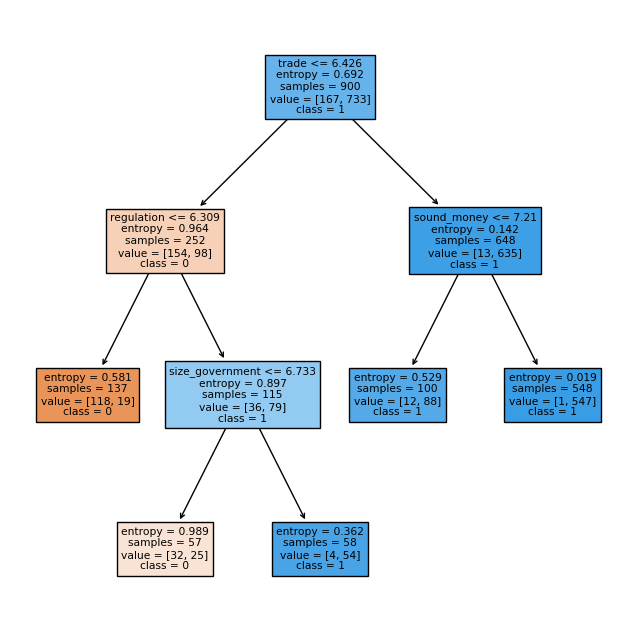

In [74]:
#第8題
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

#根據題目要求分割出需要作為訓練資料的欄位，並將freedom作為預測目標
X = ds.drop(['year', 'iso_code', 'countries', 'rank', 'freedom'], axis=1)
y = ds['freedom']

#依題目要求輸入訓練參數，並用entropy來計算節點
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=12, stratify=y)
clf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5)
clf.fit(X_train, y_train)

#顯示結果的Decision Tree
plt.figure(figsize=(8,8))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

In [75]:
#第9題
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("平均準確率: ",accuracy)

平均準確率:  0.9178690344062154


In [76]:
#第10題
from sklearn.metrics import classification_report

freedom_names = ['non-freedom', 'freedom']
print(classification_report(y_test, y_pred, target_names=freedom_names))

              precision    recall  f1-score   support

 non-freedom       0.75      0.83      0.79       168
     freedom       0.96      0.94      0.95       733

    accuracy                           0.92       901
   macro avg       0.86      0.89      0.87       901
weighted avg       0.92      0.92      0.92       901



In [77]:
#第11題

#創建訓練資料比例和準確度的list
train_ratios = [0.5, 0.6, 0.7, 0.8, 0.9]
accuracies_list = []

#依訓練資料比例一一訓練並將準確度存入accuracies_list(訓練也都以entropy來計算節點)
for train_ratio in train_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_ratio, random_state=12, stratify=y)
    clf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_list.append(accuracy)

#用訓練資料比例取得split_proportion欄位的各項值(名稱)
split_proportion = []
for train_ratio in train_ratios:
    x = train_ratio
    split_proportion.append(str(int(x*100)) + '/' + str(round((1-x)*100)))

#印出結果
result_df = pd.DataFrame({'split_proportion': split_proportion, 'score': accuracies_list})
print(result_df)

  split_proportion     score
0            50/50  0.917869
1            60/40  0.925104
2            70/30  0.907579
3            80/20  0.908587
4            90/10  0.883978


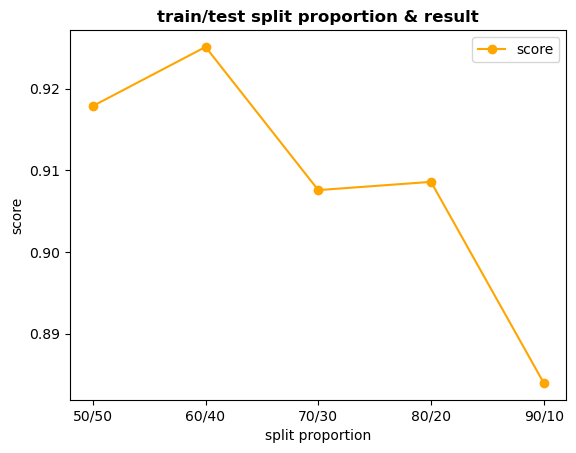

In [78]:
#第12題
import matplotlib.pyplot as plt

split_proportions = result_df['split_proportion'].tolist()
scores = result_df['score'].tolist()
plt.plot(split_proportions, scores, marker='o',color='orange')
plt.legend(['score'], loc='best')
plt.title('train/test split proportion & result', fontweight='bold')
plt.xlabel('split proportion')
plt.ylabel('score')

plt.show()

In [79]:
#輸出csv檔
ds.to_csv('ECT_HW2_109403021.csv', encoding = 'utf-8-sig')